### I have used different Feature selection techniques in this code.
1) Random Forest Feature Importance Criteria
2) Recursive Feature Elimination Technique (RFE)
3) Principle Component Analysis (PCA) (For Dimensionality Reduction)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import operator
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('phase_data_sample.csv')
pd.set_option('display.max_columns', None)

In [4]:
print(df.shape)
df.head()

(17337, 135)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,label
0,-2.431423,1.483793,-1.161452,1.791645,0.270695,-0.089481,0.356688,1.632386,-0.572265,0.099085,0.510428,0.602834,-2.611784,-0.655756,1.971535,-0.699091,0.275910,-0.123512,-1.649618,0.226110,-1.663660,-0.854073,-0.254454,0.390958,-0.006717,-1.384508,-1.564886,-1.469919,-0.758258,-0.264166,0.555455,0.429307,-0.683309,0.864091,0.335840,0.273424,0.912177,1.417625,-1.503210,-3.229948,0.309263,-0.958911,-0.561021,-0.186811,-1.674358,0.087865,-0.156046,-1.718038,0.075944,-0.949454,-0.546214,-0.158087,-0.415936,-0.552641,-0.384329,-0.428871,-0.346411,-0.399375,-0.392835,-0.341224,0.939621,-1.848086,0.835272,-2.699907,1.664515,-0.978482,2.466605,-0.301193,-0.337791,-0.073385,1.711205,0.05499,-0.003045,0.560834,1.099961,-3.784082,-1.526571,2.173336,-0.812729,0.159144,0.218429,-3.271733,0.44488,-2.560023,-0.756626,-0.17203,-0.099119,-0.448836,-2.229112,-0.925046,-1.935574,-1.671336,0.077495,1.70438,0.558248,-1.03424,1.260648,0.854761,0.738142,1.862321,1.591342,-1.48227,-3.02827,0.340762,-0.660121,-0.943919,-0.746944,-1.166236,0.830219,-0.587426,-2.716165,0.224809,-1.226167,-0.46066,-0.199405,-0.294773,-0.540792,-0.10098,-0.07655,-0.123149,-0.194507,-0.309327,4.153249,-0.177772,-0.158242,-0.415398,-0.452132,-0.360327,-0.159069,-0.338560,-0.322463,-0.143152,-1.080384,0.538832,0
1,-2.811765,0.697328,-2.056736,0.978536,-0.911127,-0.973984,-1.916140,0.007252,1.290173,-1.655500,2.227854,0.488801,0.869589,0.524477,-0.072759,-0.372948,0.410288,1.633895,-0.080093,-0.662573,0.126520,-0.068859,-1.015324,0.470486,-1.665262,-1.051583,-0.419912,-1.908337,-2.694637,0.203448,0.797356,0.672867,-0.556727,-0.223796,-1.032485,-0.558210,-0.183893,-1.217633,0.999451,0.312074,-1.045948,-0.451498,0.228375,0.773793,1.185013,-0.111135,-2.458225,0.635025,-0.756338,-0.045011,-0.546214,-0.158087,-0.073106,-0.552641,-0.384329,-0.182729,-0.346411,-0.005420,0.010922,-0.341224,0.108530,0.575377,0.086622,-2.699907,1.664515,-0.978482,2.466605,-0.301193,-0.337791,-0.073385,1.711205,0.05499,-0.003045,0.560834,1.099961,-3.784082,-1.526571,2.173336,-0.812729,0.159144,0.218429,-3.271733,0.44488,-2.560023,-0.756626,-0.17203,-0.099119,-0.448836,-2.229112,-0.925046,-1.935574,-1.671336,0.077495,1.70438,0.558248,-1.03424,1.260648,0.854761,0.738142,1.862321,1.591342,-1.48227,-3.02827,0.340762,-0.660121,-0.943919,-0.746944,-1.166236,0.830219,-0.587426,-2.716165,0.224809,-1.226167,-0.46066,-0.199405,-0.294773,-0.540792,-0.10098,-0.07655,-0.123149,-0.194507,-0.309327,4.153249,-0.177772,-0.158242,-0.415398,-0.215571,0.263873,-0.159069,-0.338560,-0.322463,-0.143152,-0.973158,0.538832,1
2,-0.103309,-0.413561,0.030206,-0.230614,-0.200565,-0.235467,0.078330,0.601497,0.102205,0.044518,-0.131271,-0.143971,0.214676,0.261350,-0.221840,0.210723,0.368094,0.339829,0.201755,0.140167,-0.252236,0.211500,-0.322554,-0.225943,-0.069276,0.732342,0.244520,0.384309,0.131573,0.069193,-1.182271,0.285562,0.255605,0.461599,-0.110563,0.160692,-0.257467,-0.275564,0.005752,-0.057336,-0.387577,0.153561,-0.095784,-0.152400,0.107925,-0.200695,-0.448275,-0.271764,-0.363180,-0.262740,1.492851,-0.158087,-0.073106,-0.552641,0.558302,0.008714,-0.346411,-0.399375,-0.392835,-0.341224,0.364250,0.548745,-0.028555,-2.699907,1.664515,-0.978482,2.466605,-0.301193,-0.337791,-0.073385,1.711205,0.05499,-0.003045,0.560834,1.099961,-3.784082,-1.526571,2.173336,-0.812729,0.159144,0.218429,-3.271733,0.44488,-2.560023,-0.756626,-0.17203,-0.099119,-0.448836,-2.229112,-0.925046,-1.935574,-1.671336,0.077495,1.70438,0.558248,-1.03424,1.260648,0.854761,0.738142,1.862321,1.591342,-1.48227,-3.02827,0.340762,-0.660121

Checking for missing values for all variables

In [5]:
print(df.isna().sum())
df.dropna(inplace = True)

0        0
1        0
2        0
3        0
4        0
        ..
130      0
131      0
132      0
133      0
label    0
Length: 135, dtype: int64


Basic Count plot is created in order to visualize the number of observations for each class. Here we can see that the for class 2,3,4,6,11-13,15,16 is very low. Hence its very difficult for the model to capture the underlining trends of these classes. We can use SMOTE or Class weights to improve the model for these classes.

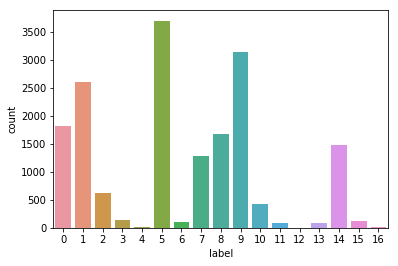

In [6]:
sns.countplot(df['label'])

In [7]:
x = df.drop('label',1)
y = df['label']

Spliting the dataset in train and validation with 80/20 ratio.

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [9]:
dt = RandomForestClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(accuracy_score(y_test,pred))

0.8324682814302191


Here we can see that recall and precision for few classes is very less as there are not enough observations for the model to capture to trends for that class.

In [10]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       375
           1       0.92      0.86      0.89       526
           2       0.83      0.97      0.90       113
           3       0.41      0.53      0.46        17
           4       0.75      0.43      0.55         7
           5       0.85      0.91      0.88       754
           6       0.33      0.21      0.26        19
           7       0.86      0.88      0.87       266
           8       0.79      0.84      0.81       339
           9       0.85      0.82      0.83       633
          10       0.66      0.43      0.52        77
          11       0.67      0.22      0.33        18
          12       0.00      0.00      0.00         2
          13       0.67      0.35      0.46        17
          14       0.83      0.88      0.85       272
          15       0.83      0.52      0.64        29
          16       1.00      0.50      0.67         4

    accuracy              

Here I have calculated the feature importance of every variable which is calculated from the base Decision Tree fitted on the dataset. I have created a Dataframe which contains the feature names along with its importance value in descending order.

In [11]:
features = pd.DataFrame([x.columns,dt.feature_importances_]).T
features.columns = ['Feature Name','Feature Importance']
features_sorted = features.sort_values(by=['Feature Importance'],ascending =False)
features_sorted.head(25)

,Feature Name,Feature Importance
132,132,0.0557318
125,125,0.0501337
126,126,0.0315235
55,55,0.0285696
62,62,0.0283811
50,50,0.0281773
58,58,0.0231831
61,61,0.0212471
60,60,0.0210902
91,91,0.020947


I have created two lists one is for accuracy and one is for columns. Then an Adaboost Classifier is used with Decision Tree as the base algorithm. The variables which are used for fitting the model are ordered with the length of 10. Like the first model is fitted with top 1 feature. Next Model is fitted with top 11 features and next is fitted with top 21 features then with 31, 41 and so on till all 134 features are fitted. Finally accuracy and list of columns are appended in the respective lists.

In [12]:
accuracy = []
columns = []
for i in tqdm(range(1,df.shape[1],10)):
    df1 = df[features_sorted['Feature Name'][:i].values.tolist()]
    columns.append(df1.columns.tolist())
    y = df['label']
    x_train,x_test,y_train,y_test = train_test_split(df1,y,test_size = 0.2,random_state = 42)
    ada = AdaBoostClassifier(DecisionTreeClassifier())
    ada.fit(x_train,y_train)
    pred = ada.predict(x_test)
    accuracy.append(accuracy_score(y_test,pred))

100%|██████████| 14/14 [05:29<00:00, 36.63s/it]


Here we can see that Maximum Accuracy Achieved is 85.3%. The model which gives the maximum accuracy is created by top 81 features based on the feature importance captured by the initial simple decision tree classifier.

In [13]:
print(np.argmax(accuracy))
print(max(accuracy))

8
0.8538062283737025


List of Importance Features

In [16]:
print('There are ',len(columns[np.argmax(accuracy)]),' number of features those are important and they are (In Descending order):- ')
print(columns[np.argmax(accuracy)])

There are  81  number of features those are important and they are (In Descending order):- 
['132', '125', '126', '55', '62', '50', '58', '61', '60', '91', '127', '65', '72', '57', '52', '53', '54', '28', '2', '16', '33', '97', '73', '38', '0', '105', '75', '13', '76', '24', '82', '40', '9', '44', '8', '18', '11', '47', '5', '26', '30', '45', '4', '71', '42', '59', '7', '130', '6', '20', '41', '103', '43', '29', '36', '14', '85', '90', '25', '120', '23', '12', '15', '1', '32', '80', '133', '22', '88', '19', '49', '17', '129', '131', '21', '39', '78', '48', '79', '34', '3']


Basic Bar graph used for visualization of the feature importance and with its respective feature name.

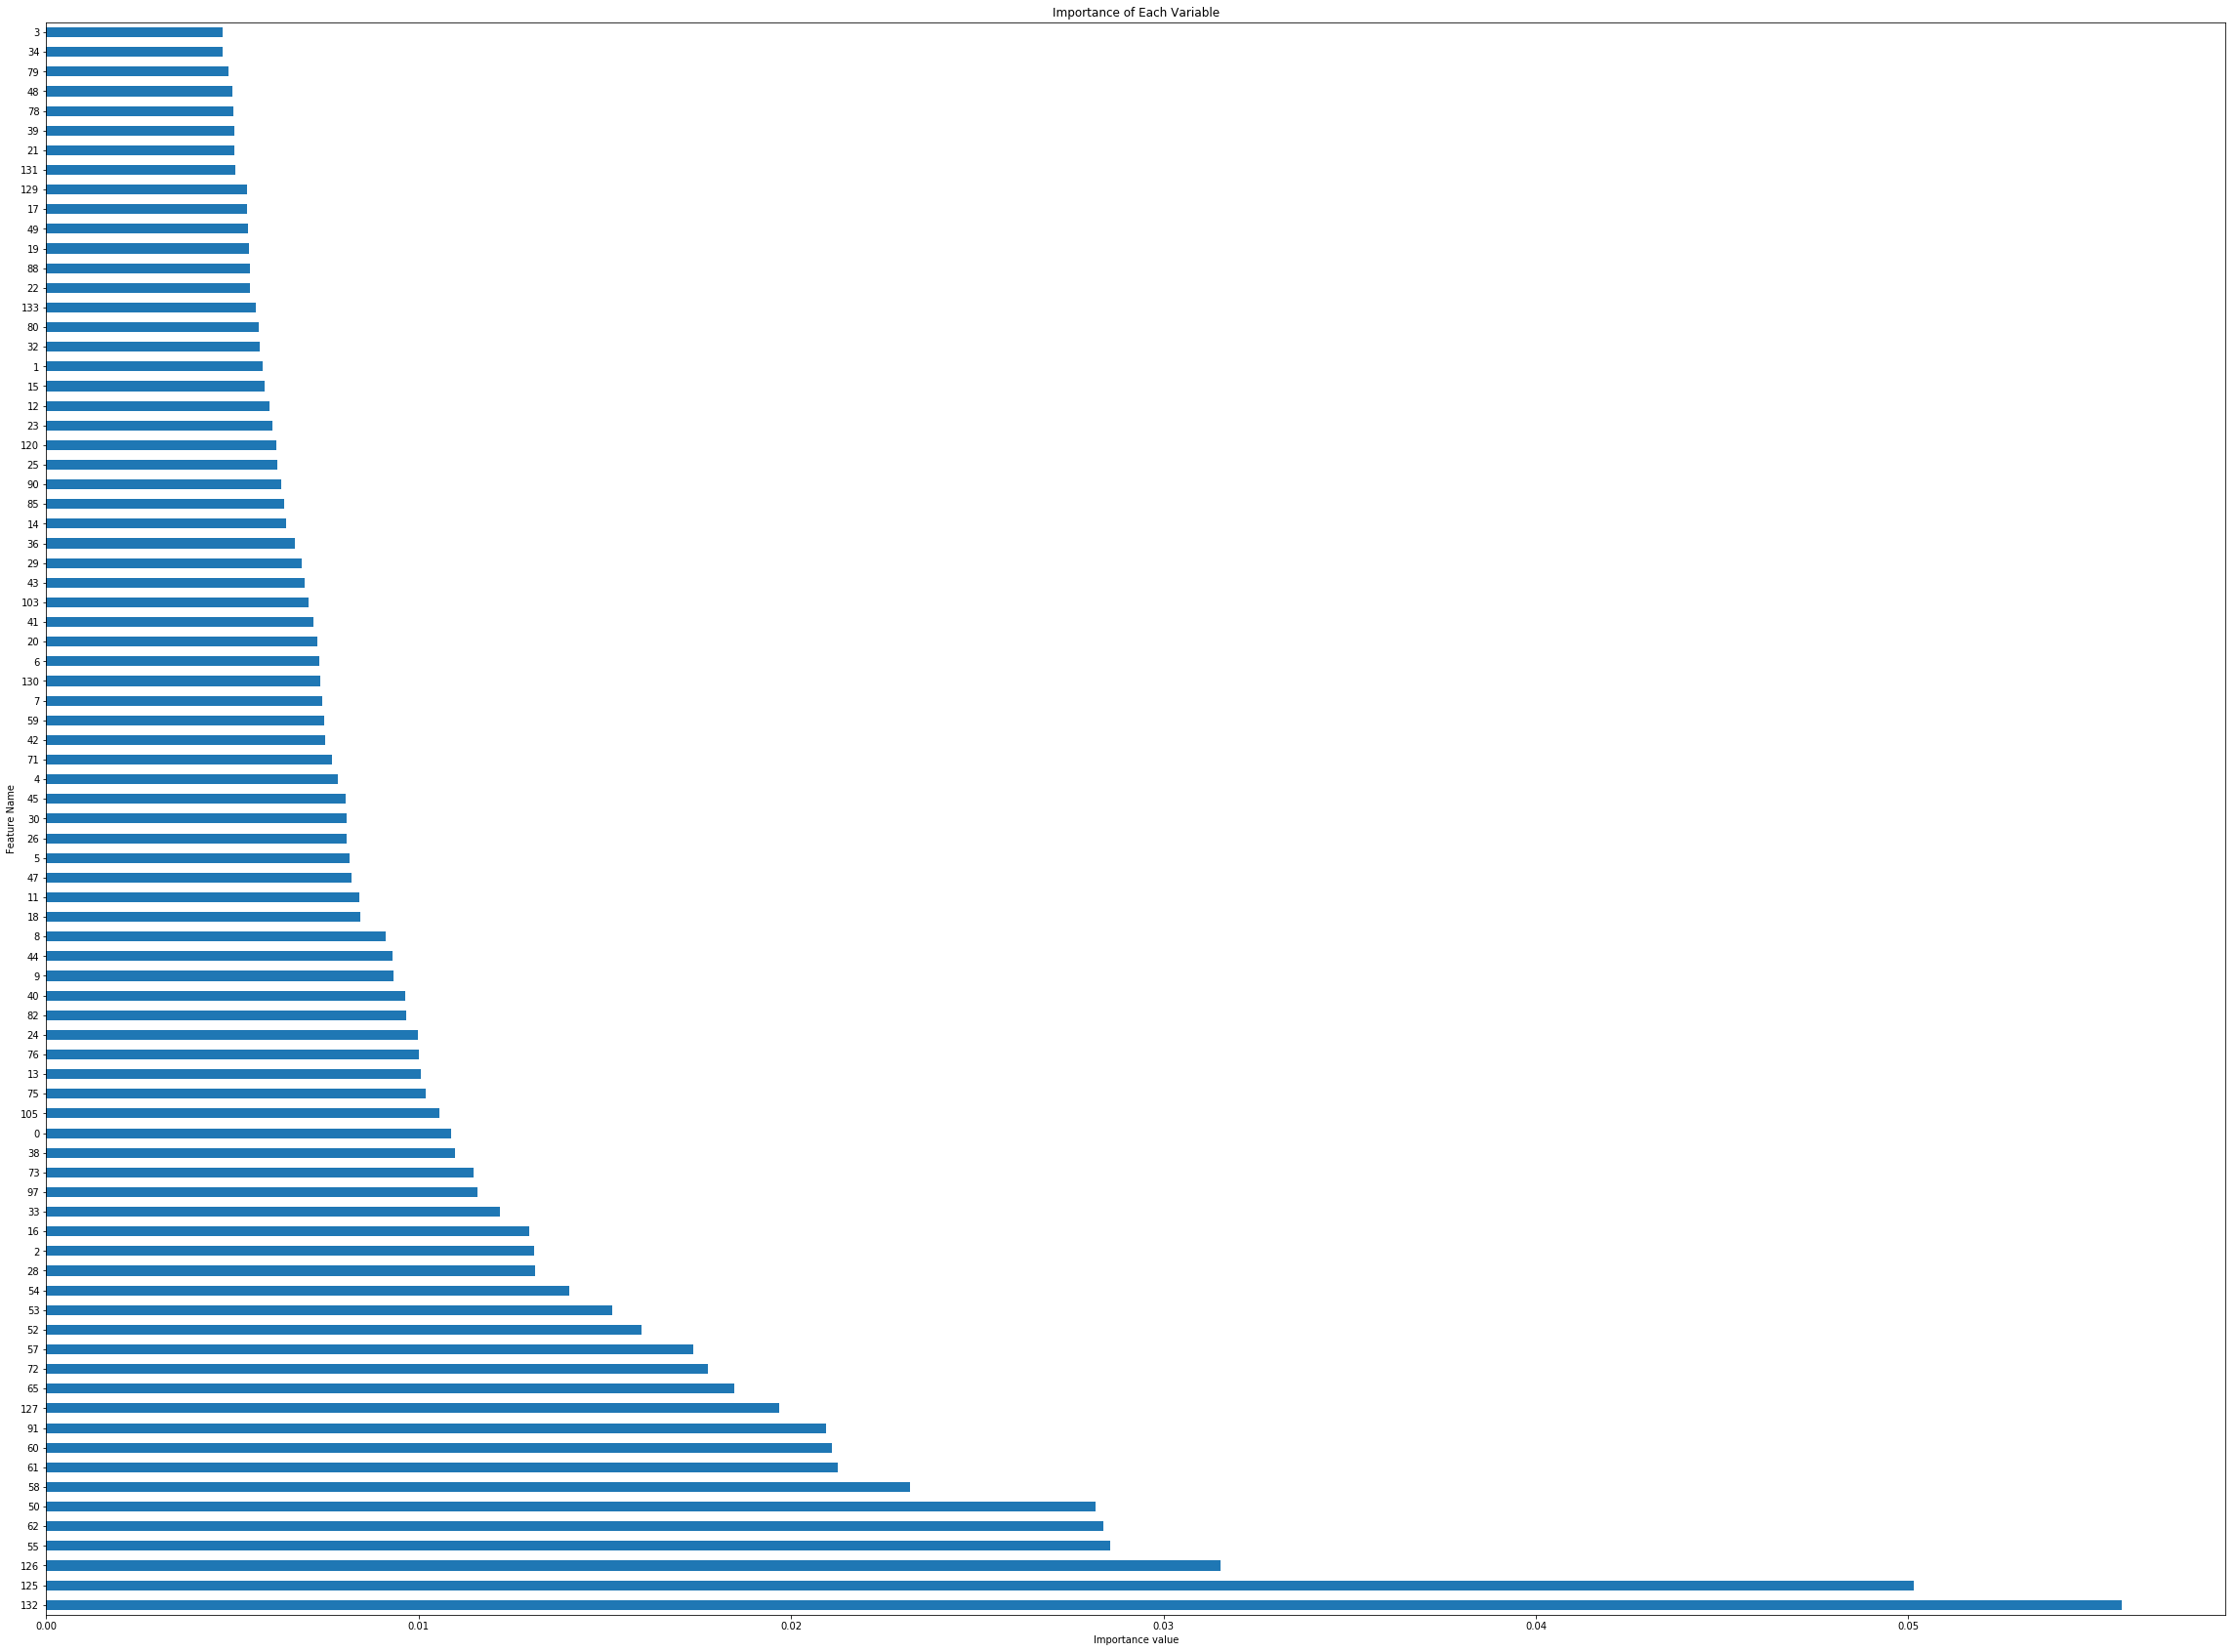

In [18]:
feat_importances = pd.Series(dt.feature_importances_, index=x.columns)
plt.figure(figsize=(40,30))
feat_importances.nlargest(len(columns[np.argmax(accuracy)])).plot(kind='barh')
plt.xlabel('Importance value')
plt.ylabel('Feature Name')
plt.title('Importance of Each Variable')
plt.show()

Here I have used a similar procedure the only difference is that I have used RandomForestClassifier with grid search for a bit of HyperParameter tuning.

In [19]:
accuracy = []
columns = []
for i in tqdm(range(1,df.shape[1],10)):
    df1 = df[features_sorted['Feature Name'][:i].values.tolist()]
    columns.append(df1.columns.tolist())
    y = df['label']
    x_train,x_test,y_train,y_test = train_test_split(df1,y,test_size = 0.2,random_state = 42)
    param = {'max_depth' : np.arange(10,100,20),'n_estimators':np.arange(100,400,150)}
    grid = GridSearchCV(RandomForestClassifier(),param_grid=param,cv = 10, verbose = 3 , n_jobs = 1)
    grid.fit(x_train,y_train)
    pred = grid.predict(x_test)
    accuracy.append(accuracy_score(y_test,pred))

  0%|          | 0/14 [00:00<?, ?it/s][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.344, total=   0.5s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.357, total=   0.6s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.350, total=   0.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.342, total=   0.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.358, total=   0.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.343, total=   0.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.348, total=   0.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.357, total=   0.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.361, total=   0.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.343, total=   0.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.355, total=   0.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.348, total=   0.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.342, total=   0.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.358, total=   0.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.342, total=   0.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.347, total=   0.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished
  7%|▋         | 1/14 [01:33<20:13, 93.34s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.754, total=   1.3s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.753, total=   1.3s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.771, total=   1.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.758, total=   1.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.755, total=   1.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.765, total=   1.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.755, total=   1.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.757, total=   1.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.748, total=   1.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.791, total=   1.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.789, total=   1.9s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.810, total=   1.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.799, total=   1.9s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.785, total=   1.9s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.801, total=   1.9s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.796, total=   1.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.2min finished
 14%|█▍        | 2/14 [06:49<32:01, 160.09s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.795, total=   1.6s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.797, total=   1.6s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.805, total=   1.6s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.798, total=   1.6s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.799, total=   1.6s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.795, total=   1.6s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.795, total=   1.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.793, total=   1.6s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.800, total=   1.6s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.846, total=   2.4s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.844, total=   2.4s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.857, total=   2.3s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.852, total=   2.3s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.832, total=   2.3s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.849, total=   2.4s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.852, total=   2.4s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.4min finished
 21%|██▏       | 3/14 [13:19<42:02, 229.29s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.797, total=   1.8s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   1.9s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.804, total=   1.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.798, total=   1.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.793, total=   1.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   1.9s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.793, total=   1.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.792, total=   1.9s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.800, total=   1.9s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.844, total=   2.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.843, total=   2.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.855, total=   2.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.853, total=   2.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.824, total=   2.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.849, total=   2.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.844, total=   2.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.3min finished
 29%|██▊       | 4/14 [20:46<49:04, 294.45s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.798, total=   2.4s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.797, total=   2.4s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.807, total=   2.4s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.814, total=   2.4s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.806, total=   2.4s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   2.4s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.798, total=   2.4s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.790, total=   2.4s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   2.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.843, total=   3.4s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.842, total=   3.4s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.850, total=   3.3s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.850, total=   3.4s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.832, total=   3.4s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.855, total=   3.4s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.845, total=   3.4s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.2min finished
 36%|███▌      | 5/14 [30:10<56:17, 375.23s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.794, total=   2.6s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.802, total=   2.6s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.802, total=   2.6s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.813, total=   2.6s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   2.6s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.806, total=   2.6s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.803, total=   2.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.791, total=   2.7s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.804, total=   2.6s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.844, total=   3.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.845, total=   3.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.855, total=   3.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.852, total=   3.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.829, total=   3.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.854, total=   3.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.844, total=   3.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.1min finished
 43%|████▎     | 6/14 [40:25<59:37, 447.22s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.798, total=   2.4s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.806, total=   2.5s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.808, total=   2.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.813, total=   2.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.804, total=   2.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.809, total=   2.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.807, total=   2.4s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.805, total=   2.5s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.802, total=   2.4s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.840, total=   3.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.839, total=   3.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.851, total=   3.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.854, total=   3.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.832, total=   3.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.849, total=   3.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.845, total=   3.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.9min finished
 50%|█████     | 7/14 [50:29<57:39, 494.28s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.794, total=   2.8s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.807, total=   2.9s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.808, total=   2.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.817, total=   2.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   2.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.811, total=   2.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.807, total=   2.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.803, total=   2.9s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   2.9s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.839, total=   4.1s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.843, total=   4.1s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.850, total=   4.1s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.853, total=   4.2s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.829, total=   4.2s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.851, total=   4.2s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.834, total=   4.1s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.3min finished
 57%|█████▋    | 8/14 [1:02:01<55:20, 553.48s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.796, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.803, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.810, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.816, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.799, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.802, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.802, total=   3.0s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.805, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.799, total=   3.0s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.846, total=   4.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.846, total=   4.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.848, total=   4.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.856, total=   4.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.830, total=   4.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.851, total=   4.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.838, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.4min finished
 64%|██████▍   | 9/14 [1:14:40<51:16, 615.31s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.796, total=   3.0s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.800, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.815, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.821, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.808, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.810, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.809, total=   3.0s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.799, total=   3.0s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.848, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.843, total=   4.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.848, total=   4.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.849, total=   4.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.831, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.853, total=   4.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.836, total=   4.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.5min finished
 71%|███████▏  | 10/14 [1:27:24<43:59, 659.81s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.805, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.809, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.819, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.804, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.808, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.804, total=   3.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.808, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.839, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.845, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.843, total=   4.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.848, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.829, total=   4.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.848, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.842, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 13.0min finished
 79%|███████▊  | 11/14 [1:40:35<34:57, 699.16s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.796, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.803, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.810, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.817, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.803, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.806, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   3.0s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.792, total=   2.9s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.839, total=   4.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.842, total=   4.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.844, total=   4.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.848, total=   4.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.827, total=   4.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.849, total=   4.5s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.841, total=   4.6s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.4min finished
 86%|████████▌ | 12/14 [1:53:09<23:51, 715.73s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.800, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.798, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.810, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.813, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.796, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.799, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.805, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.803, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.800, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.836, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.842, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.845, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.852, total=   4.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.829, total=   4.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.855, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.838, total=   4.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 13.0min finished
 93%|█████████▎| 13/14 [2:06:25<12:19, 739.91s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.794, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.795, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.809, total=   3.0s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.817, total=   3.0s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.801, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.797, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.802, total=   3.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.805, total=   3.0s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.796, total=   3.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=70, n_estimators=100, score=0.836, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.840, total=   4.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.844, total=   4.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.850, total=   4.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.825, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.844, total=   4.8s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] ...... max_depth=70, n_estimators=100, score=0.837, total=   4.7s
[CV] max_depth=70, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.7min finished
100%|██████████| 14/14 [2:19:21<00:00, 750.71s/it]


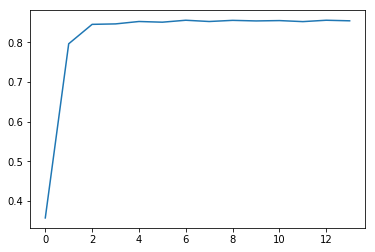

In [20]:
plt.plot(accuracy)

Here the maximum accuracy achieved is 85.6%

In [21]:
print(np.argmax(accuracy))
print(max(accuracy))

6
0.8561130334486736


In [22]:
print(columns[np.argmax(accuracy)])

['132', '125', '126', '55', '62', '50', '58', '61', '60', '91', '127', '65', '72', '57', '52', '53', '54', '28', '2', '16', '33', '97', '73', '38', '0', '105', '75', '13', '76', '24', '82', '40', '9', '44', '8', '18', '11', '47', '5', '26', '30', '45', '4', '71', '42', '59', '7', '130', '6', '20', '41', '103', '43', '29', '36', '14', '85', '90', '25', '120', '23']


Same procedure with SVC

In [26]:
accuracy = []
columns = []

for i in tqdm(range(1,df.shape[1],10)):
    df1 = df[features_sorted['Feature Name'][:i].values.tolist()]
    columns.append(df1.columns.tolist())
    y = df['label']
    x_train,x_test,y_train,y_test = train_test_split(df1,y,test_size = 0.2,random_state = 42)
    param = {'C' : np.arange(10,50,10)}
    grid = GridSearchCV(SVC(),param_grid=param,cv = 5, verbose = 3 , n_jobs = 1)
    grid.fit(x_train,y_train)
    pred = grid.predict(x_test)
    accuracy.append(accuracy_score(y_test,pred))



  0%|          | 0/14 [00:00<?, ?it/s][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.351, total=  12.2s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


[CV] ................................ C=10, score=0.351, total=  12.5s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.8s remaining:    0.0s


[CV] ................................ C=10, score=0.354, total=  12.7s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.361, total=  11.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.353, total=  12.9s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.351, total=  17.4s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.356, total=  16.9s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.353, total=  17.6s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.361, total=  18.3s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.6min finished


  7%|▋         | 1/14 [07:14<1:34:11, 434.70s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.727, total=   4.8s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] ................................ C=10, score=0.745, total=   4.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


[CV] ................................ C=10, score=0.738, total=   4.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.729, total=   4.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.731, total=   4.9s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.732, total=   5.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.749, total=   5.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.742, total=   5.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.742, total=   5.1s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.7min finished


 14%|█▍        | 2/14 [09:06<1:07:32, 337.73s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.798, total=   4.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] ................................ C=10, score=0.811, total=   4.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


[CV] ................................ C=10, score=0.805, total=   4.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.805, total=   4.8s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.805, total=   4.9s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.801, total=   5.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.817, total=   5.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.807, total=   5.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.812, total=   5.0s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.7min finished


 21%|██▏       | 3/14 [10:58<49:32, 270.21s/it]  [Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.810, total=   5.6s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV] ................................ C=10, score=0.814, total=   5.6s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.2s remaining:    0.0s


[CV] ................................ C=10, score=0.813, total=   5.5s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.811, total=   5.5s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.822, total=   5.6s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.807, total=   5.7s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.815, total=   5.8s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.813, total=   5.8s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.809, total=   5.7s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished


 29%|██▊       | 4/14 [13:05<37:51, 227.18s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.819, total=   6.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV] ................................ C=10, score=0.817, total=   7.0s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.9s remaining:    0.0s


[CV] ................................ C=10, score=0.819, total=   6.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.817, total=   6.8s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.823, total=   7.0s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.816, total=   7.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.816, total=   7.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.819, total=   7.0s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.814, total=   6.9s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.3min finished


 36%|███▌      | 5/14 [15:36<30:39, 204.35s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.818, total=   7.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV] ................................ C=10, score=0.818, total=   7.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.8s remaining:    0.0s


[CV] ................................ C=10, score=0.820, total=   7.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.816, total=   7.7s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.822, total=   7.9s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.819, total=   7.9s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.817, total=   7.9s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.819, total=   7.8s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.818, total=   7.7s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.6min finished


 43%|████▎     | 6/14 [18:23<25:43, 193.00s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.816, total=   8.7s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] ................................ C=10, score=0.821, total=   8.5s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.1s remaining:    0.0s


[CV] ................................ C=10, score=0.817, total=   8.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.818, total=   8.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.823, total=   8.5s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.816, total=   8.2s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.819, total=   8.2s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.819, total=   8.3s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.821, total=   8.2s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.8min finished


 50%|█████     | 7/14 [21:25<22:08, 189.77s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.815, total=   9.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


[CV] ................................ C=10, score=0.823, total=   9.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.8s remaining:    0.0s


[CV] ................................ C=10, score=0.818, total=   9.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.818, total=   9.8s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.824, total=  10.2s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.816, total=  10.4s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.821, total=   9.8s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.819, total=   9.6s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.820, total=   9.6s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.3min finished


 57%|█████▋    | 8/14 [24:55<19:34, 195.78s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.818, total=  10.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


[CV] ................................ C=10, score=0.824, total=  10.8s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.7s remaining:    0.0s


[CV] ................................ C=10, score=0.819, total=  10.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.818, total=  10.8s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.823, total=  11.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.817, total=  10.8s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.820, total=  11.0s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.821, total=  10.9s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.819, total=  10.8s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.6min finished


 64%|██████▍   | 9/14 [28:47<17:13, 206.80s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.815, total=  12.0s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s


[CV] ................................ C=10, score=0.823, total=  12.1s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.1s remaining:    0.0s


[CV] ................................ C=10, score=0.820, total=  12.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.821, total=  11.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.824, total=  12.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.815, total=  12.0s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.822, total=  11.9s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.819, total=  11.9s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.820, total=  11.7s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.0min finished


 71%|███████▏  | 10/14 [33:04<14:46, 221.72s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.816, total=  13.0s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s


[CV] ................................ C=10, score=0.822, total=  12.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.9s remaining:    0.0s


[CV] ................................ C=10, score=0.820, total=  12.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.822, total=  12.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.821, total=  13.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.816, total=  12.8s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.819, total=  12.8s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.819, total=  12.6s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.820, total=  12.6s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.3min finished


 79%|███████▊  | 11/14 [37:39<11:53, 237.84s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.814, total=  13.7s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.7s remaining:    0.0s


[CV] ................................ C=10, score=0.820, total=  13.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.6s remaining:    0.0s


[CV] ................................ C=10, score=0.816, total=  13.8s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.823, total=  13.8s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.822, total=  14.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.812, total=  13.6s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.818, total=  13.7s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.815, total=  13.6s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.817, total=  13.4s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.5min finished


 86%|████████▌ | 12/14 [42:30<08:27, 253.61s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.815, total=  15.0s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.0s remaining:    0.0s


[CV] ................................ C=10, score=0.818, total=  14.5s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.5s remaining:    0.0s


[CV] ................................ C=10, score=0.815, total=  14.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.821, total=  14.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.819, total=  14.6s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.811, total=  14.2s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.815, total=  14.2s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.815, total=  14.2s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.818, total=  14.0s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.7min finished


 93%|█████████▎| 13/14 [47:33<04:28, 268.51s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.813, total=  15.2s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.2s remaining:    0.0s


[CV] ................................ C=10, score=0.818, total=  15.0s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.2s remaining:    0.0s


[CV] ................................ C=10, score=0.812, total=  14.6s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.819, total=  14.6s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.820, total=  14.9s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.809, total=  14.6s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.816, total=  14.6s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.811, total=  14.7s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.818, total=  14.3s
[CV] C=20 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.8min finished


100%|██████████| 14/14 [52:45<00:00, 281.58s/it]

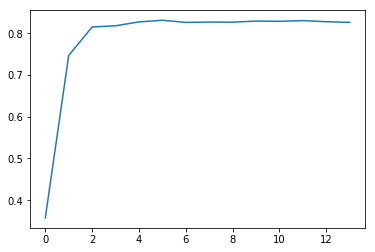

In [27]:
plt.plot(accuracy)

In [28]:
print(np.argmax(accuracy))
print(max(accuracy))

5
0.8313148788927336


In [29]:
print(columns[np.argmax(accuracy)])

['132', '125', '126', '55', '62', '50', '58', '61', '60', '91', '127', '65', '72', '57', '52', '53', '54', '28', '2', '16', '33', '97', '73', '38', '0', '105', '75', '13', '76', '24', '82', '40', '9', '44', '8', '18', '11', '47', '5', '26', '30', '45', '4', '71', '42', '59', '7', '130', '6', '20', '41']


Here I have used RFE (Recursive Feature Elimination) which works by recursively removing attributes and building a model on those attributes that remain.

In [30]:
x = df.drop('label',1)
y = df['label']
accuracy = []
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
for i in tqdm(range(5,x.shape[1],10)):
    rfe = RFE(RandomForestClassifier(),i)
    rfe.fit(x_train,y_train)
    rank = rfe.ranking_.tolist()
    cols = []
    for i in range(len(rank)):
        if rank[i]==1:
            cols.append(x.columns.tolist()[i])

    x = df.drop('label',1)
    y = df['label']
    x = x[cols]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

    rand = RandomForestClassifier()
    rand.fit(x_train,y_train)
    pred = rand.predict(x_test)
    accuracy.append(accuracy_score(y_test,pred))



  0%|          | 0/13 [00:00<?, ?it/s]

  8%|▊         | 1/13 [00:56<11:22, 56.89s/it]

 15%|█▌        | 2/13 [00:57<07:19, 39.94s/it]

 23%|██▎       | 3/13 [00:57<04:40, 28.07s/it]

 31%|███       | 4/13 [00:58<02:57, 19.77s/it]

 38%|███▊      | 5/13 [00:58<01:51, 13.96s/it]

 46%|████▌     | 6/13 [00:58<01:09,  9.89s/it]

 54%|█████▍    | 7/13 [00:59<00:42,  7.04s/it]

 62%|██████▏   | 8/13 [00:59<00:25,  5.04s/it]

 69%|██████▉   | 9/13 [00:59<00:14,  3.64s/it]

 77%|███████▋  | 10/13 [01:00<00:07,  2.66s/it]

 85%|████████▍ | 11/13 [01:00<00:03,  1.98s/it]

 92%|█████████▏| 12/13 [01:01<00:01,  1.50s/it]

100%|██████████| 13/13 [01:01<00:00,  1.17s/it]

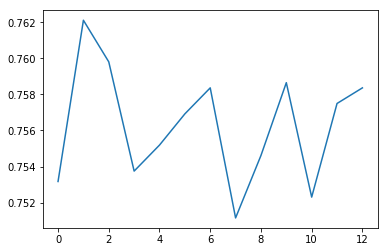

In [32]:
plt.plot(accuracy)

In [31]:
print(np.argmax(accuracy))
print(accuracy[1])

1
0.7621107266435986


Using RFE with Adaboost Classifier having RandomForest as the Base model.

In [34]:
x = df.drop('label',1)
y = df['label']
accuracy = []
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
for i in tqdm(range(5,x.shape[1],10)):
    rfe = RFE(RandomForestClassifier(),i)
    rfe.fit(x,y)
    rank = rfe.ranking_.tolist()
    cols = []
    for i in range(len(rank)):
        if rank[i]==1:
            cols.append(x.columns.tolist()[i])

    x = df.drop('label',1)
    y = df['label']
    x = x[cols]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

    rand = AdaBoostClassifier(RandomForestClassifier())
    rand.fit(x_train,y_train)
    pred = rand.predict(x_test)
    accuracy.append(accuracy_score(y_test,pred))



  0%|          | 0/13 [00:00<?, ?it/s]

  8%|▊         | 1/13 [01:08<13:38, 68.23s/it]

 15%|█▌        | 2/13 [01:18<09:19, 50.83s/it]

 23%|██▎       | 3/13 [01:28<06:26, 38.69s/it]

 31%|███       | 4/13 [01:38<04:30, 30.10s/it]

 38%|███▊      | 5/13 [01:48<03:12, 24.06s/it]

 46%|████▌     | 6/13 [01:59<02:20, 20.04s/it]

 54%|█████▍    | 7/13 [02:09<01:42, 17.15s/it]

 62%|██████▏   | 8/13 [02:19<01:15, 15.03s/it]

 69%|██████▉   | 9/13 [02:30<00:54, 13.54s/it]

 77%|███████▋  | 10/13 [02:40<00:37, 12.54s/it]

 85%|████████▍ | 11/13 [02:50<00:23, 11.96s/it]

 92%|█████████▏| 12/13 [03:00<00:11, 11.38s/it]

100%|██████████| 13/13 [03:11<00:00, 11.09s/it]

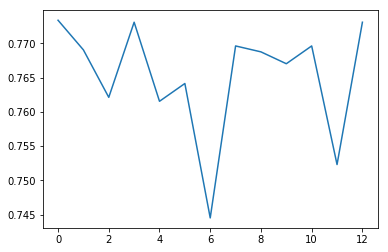

In [35]:
plt.plot(accuracy)

In [36]:
print(np.argmax(accuracy))
print(max(accuracy))

0
0.773356401384083


Using PCA to reduce the number of features and retaining only 95% of variance.

In [53]:
pca = PCA(0.95)

x = df.drop('label',1)
y = df['label']
x = pca.fit_transform(x)

print('Shape of X after PCA is {}'.format(x.shape))

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

rand = AdaBoostClassifier(RandomForestClassifier())
rand.fit(x_train,y_train)
pred = rand.predict(x_test)
print(accuracy_score(y_test,pred))

Shape of X after PCA is (17337, 53)
0.817762399077278


Here we can see the number of Parameters have been reduced from 134 to 53

In [54]:
pca = PCA(0.95)

x = df.drop('label',1)
y = df['label']
x = pca.fit_transform(x)

print('Shape of X after PCA is {}'.format(x.shape))

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)


svm = SVC()
svm.fit(x_train,y_train)
pred = svm.predict(x_test)
print(accuracy_score(y_test,pred))

Shape of X after PCA is (17337, 53)
0.7952710495963091


PCA with 95% Variance and then using KNN with Nearest neighbour hyperparameter tuning.

In [57]:
pca = PCA(0.95)

x = df.drop('label',1)
y = df['label']
x = pca.fit_transform(x)

print('Shape of X after PCA is {}'.format(x.shape))

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

param = {'n_neighbors':np.arange(5,50,10)}
grid = GridSearchCV(KNeighborsClassifier(),param,cv = 5,verbose = 3,n_jobs=1)
grid.fit(x_train,y_train)
pred = grid.predict(x_test)
print(accuracy_score(y_test,pred))

Shape of X after PCA is (17337, 53)
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... n_neighbors=5, score=0.755, total=   1.2s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ....................... n_neighbors=5, score=0.769, total=   1.2s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] ....................... n_neighbors=5, score=0.751, total=   1.2s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.755, total=   1.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.757, total=   1.1s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.734, total=   1.5s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.766, total=   1.4s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.736, total=   1.4s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.744, total=   1.3s
[CV] n_neighbors=15 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   37.7s finished


0.7658592848904268


By Applying different feature selection techniques we can see that few most important features are '132', '125', '126', '55', '62', '50', '58', '61', '60', '91', '127'. Also the maximum accuracy achieved is 85.6% with taking 81 feautres which were selected by Random Forest Feature importance function. Also the model which has performed the best is RandomForest with Grid Search CV. The model is not capturing the classes which have very less observations hence precision and recall is very less for those classes.